In [1]:
import subprocess
import sumolib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [2]:
def plot():

    network = sumolib.net.readNet('network.net.xml', withConnections=True, withInternal=False)
    edges = network.getEdges(withInternal=False)

    edges_list = []
    for edge in edges:
        geometry = LineString(edge.getShape(includeJunctions=True))
        edges_list.append({'id': edge.getID(), 'geometry': geometry})

    gdf = gpd.GeoDataFrame(pd.DataFrame(edges_list), crs='EPSG:4326')

    fig, ax = plt.subplots(figsize=(1, 1), dpi=600)
    gdf.plot(linewidth=0.1, ax=ax, aspect=1)
    ax.set_xlabel('x [m]', fontsize=2, labelpad=2)
    ax.set_ylabel('y [m]', fontsize=2, labelpad=2)
    ax.spines['left'].set_linewidth(0.2)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', labelsize=2, pad=1, length=0.8, width=0.2, top=False, right=False)
    ax.minorticks_off()

    plt.show()

    return

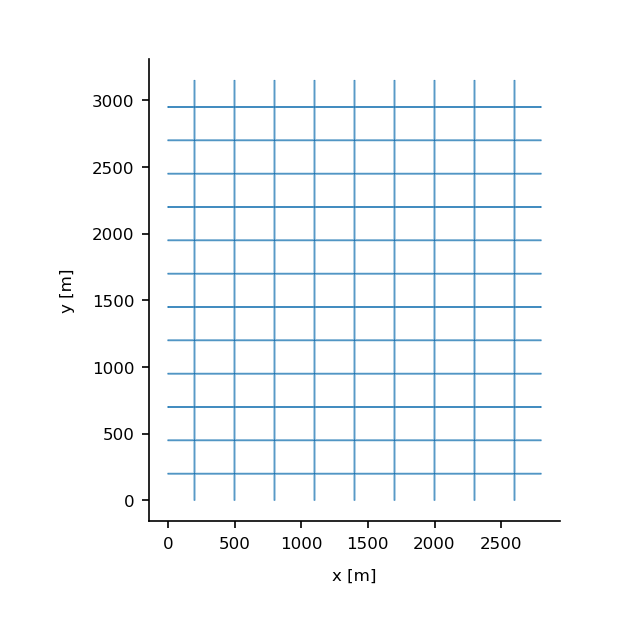

In [3]:
subprocess.call('netgenerate --grid --grid.x-number=9 --grid.y-number=12 --grid.x-length=300 --grid.y-length=250 --default.lanenumber 2 --tls.guess --tls.cycle.time 60 --grid.attach-length 200 --no-turnarounds.tls --output-file=network.net.xml', shell=True)
plot()

In [4]:
# calculate the value for -p argument
time_range = 21600 - 0
n_trips = 12000 * 6
p_value = time_range / n_trips

subprocess.run(f'python "%SUMO_HOME%\\tools\\randomTrips.py" -n network.net.xml -o trips.trip.xml -b 0 -e 3600 -p {p_value}', shell=True, capture_output=True, text=True)

CompletedProcess(args='python "%SUMO_HOME%\\tools\\randomTrips.py" -n network.net.xml -o trips.trip.xml -b 0 -e 3600 -p 0.3', returncode=0, stdout='', stderr='')